# Coding project - Tumour segmentation

The image below is a slice of a brain MRI with a large tumour in it. The goal of this project is to create an algorithm to automatically segment the tumour.

Given that the resolution of the image is of 0.115 cm/px in both axis, estimate the area of the tumour (in cm²). 

<IPython.core.display.Javascript object>


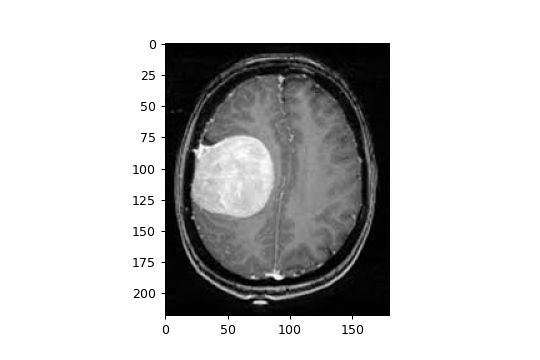

In [263]:
from skimage.io import imread,imshow
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm 
%matplotlib notebook

im = imread('mri_brain.jpg')

plt.figure()
plt.imshow(im)
plt.show()

# REPORT 

In order to segment a tumour in an input MRI scan image, the following algorithm is implemented. The different explanations for every function and process will be featured below.

In [264]:
from ipywidgets import interact, interactive, fixed
from IPython.display import display
import ipywidgets as widgets
from skimage.morphology import watershed,disk
import skimage.filters.rank as skr
from skimage.segmentation import mark_boundaries

## Determination of coordinates

Two functions are defined below. determine_coord function allows obviously to the user to choose the 'coordinates' (in pixel unit) of the two markers that will be set on the input MRI image. In fact, those two markers are respectively the tumour, and the rest. The user will be able to choose the coordinates by 2 sliders for each point on the image (i.e. 4 sliders in total) corresponding to the x and y axis. Then the second function f allows to use the interactive function from the ipywidgets library.

In [280]:
def f(y, x) :
    display((y, x))
    return (y, x)
  
def determine_coord(im) :
    imgray = im[:,:,0] # Same as converting rgb to gray 
    # Display the input MRI image with the pointer at the center of the image first
    plt.figure()
    plt.imshow(im)
    plt.plot(im.shape[1]//2, im.shape[0]//2, 'ro')
    plt.show()
    # Generate the slider for the determination of the pointer of the coordinates of the tumour
    coord_tumour = interactive(f, y=widgets.IntSlider(min=0, max=im.shape[0], step=1, value=im.shape[0]/2), x=widgets.IntSlider(min=0, max=im.shape[1], step=1, value=im.shape[1]/2))
    # Display the slider
    display(coord_tumour)
    # Generate the slider for the determination of the pointer of the coordinates of the rest
    coord_rest = interactive(f, y=widgets.IntSlider(min=0, max=im.shape[0], step=1, value=im.shape[0]/2), x=widgets.IntSlider(min=0, max=im.shape[1], step=1, value=im.shape[1]/2))
    # Display the slider
    display(coord_rest)
    
    return coord_tumour, coord_rest


## Segmentation function

Once the user has chosen the coordinates, the segmentation can proceed. The following segmentation function is used to display the 2 coordinates on the input MRI image, then the watershed function is applied. To do so, the gradient has to be computed and the markers have to be selected from the coordinates chosen by the user. 
Finally, the mark_boundaries function from the skimage.segmentation library is applied.

Note that the coordinates must be chosen before running this function.

In [276]:
def segmentation(im, coord1, coord2) :
    # Display the 2 chosen coordinates
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(im)
    plt.plot(coord1.children[1].value, coord1.children[0].value, 'ro')
    plt.subplot(1,2,2)
    plt.imshow(im)
    plt.plot(coord2.children[1].value, coord2.children[0].value, 'bo')
    plt.show()
    
    # Gradient computed on a 1-channel image
    imgray = im[:,:,0]
    gradient = skr.gradient(skr.median(imgray, disk(4)), disk(3))  # median function applied to denoise the image
    
    # Set the markers
    markers = np.zeros_like(imgray)
    markers[coord1.children[0].value, coord1.children[1].value] = 1   # Tumour
    markers[coord2.children[0].value, coord2.children[1].value] = 2   # The rest
    
    # Watershed function applied
    ws = watershed(gradient, markers)
    
    # Mark boundaries function applied
    segment = mark_boundaries(imgray, ws)
    
    return gradient, markers, ws, segment

## Computing the area of the tumour

The area function is created to compute the area of the tumour in the input MRI image. It takes as arguments the watershed output provided from the segmentation function above and the resolution of the image. As a result, the pixels counted in the tumour are set at the value 1 defined also in the function above. Note that it returns the computed area but also the pixels of the segmented tumour.

In [307]:
def compute_area(wshed, resolution) :
    # Pixels of the tumour    
    pxls = wshed[wshed==1].sum()
    # The area of 1 pixel is the value of resolution^2
    pixel_area = resolution*resolution
    output = pxls*pixel_area
    return pxls, output

## Application

Application on the given MRI scan of a brain.

<IPython.core.display.Javascript object>


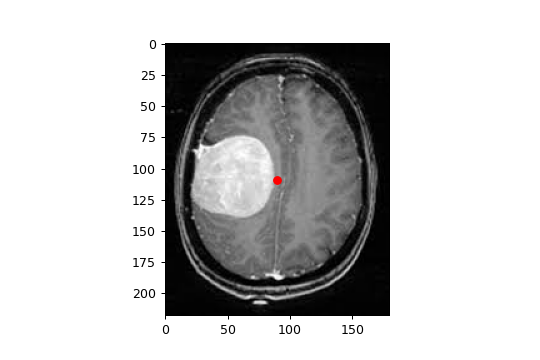

interactive(children=(IntSlider(value=109, description='y', max=218), IntSlider(value=90, description='x', max…

interactive(children=(IntSlider(value=109, description='y', max=218), IntSlider(value=90, description='x', max…

In [298]:
im = imread('mri_brain.jpg')
coord_tumour, coord_rest = determine_coord(im)

<IPython.core.display.Javascript object>


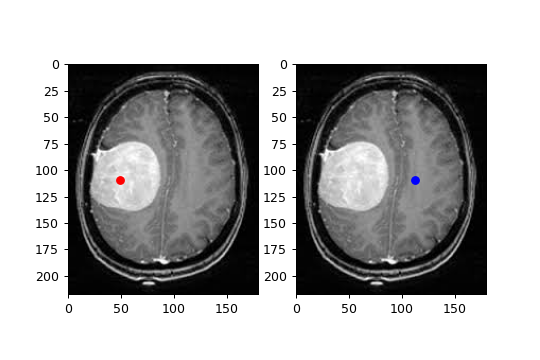

<IPython.core.display.Javascript object>


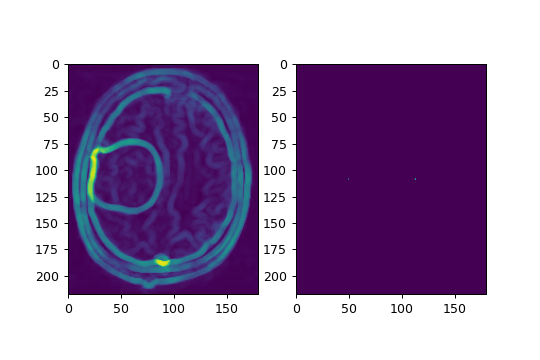

<IPython.core.display.Javascript object>


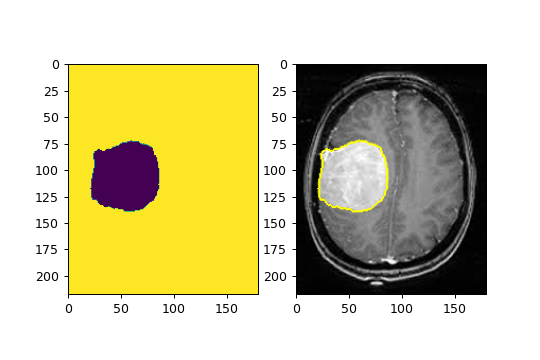

The area estimated of the tumour is about 46.3933 cm²


In [312]:
gradient, markers, ws, segment = segmentation(im, coord_tumour, coord_rest)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(gradient)
plt.subplot(1,2,2)
plt.imshow(markers)
plt.show()

plt.figure()
plt.subplot(1,2,1)
plt.imshow(ws)
plt.subplot(1,2,2)
plt.imshow(segment)
plt.show()

resolution = 0.115

# Compute the area of the tumour depending on the resolution of the input MRI image
pixels, area_value = compute_area(ws, resolution)

print("The area estimated of the tumour is about", area_value, "cm²")

## Second application

This application is here to show that the algorithm implemented can be generalized. The input image will be a MRI scan of a hand. The resolution is unknown so one assumes that the resolution is approximately the same as the previous image.

<IPython.core.display.Javascript object>


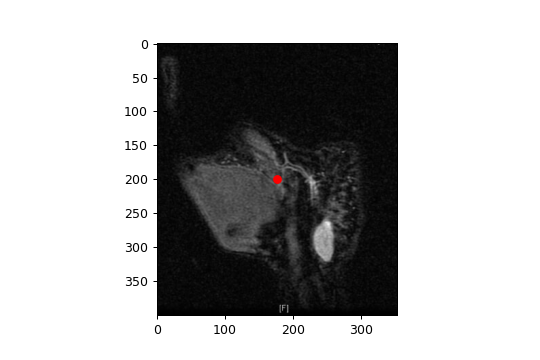

interactive(children=(IntSlider(value=200, description='y', max=400), IntSlider(value=176, description='x', ma…

interactive(children=(IntSlider(value=200, description='y', max=400), IntSlider(value=176, description='x', ma…

In [310]:
im2 = imread('tumour.jpg')
coord_tumour2, coord_rest2 = determine_coord(im2)

<IPython.core.display.Javascript object>


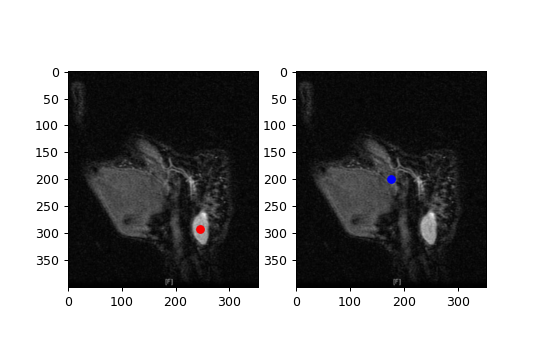

<IPython.core.display.Javascript object>


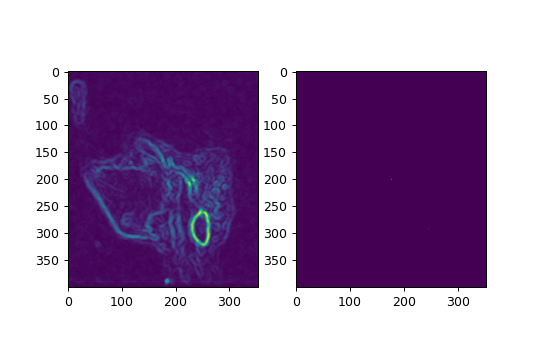

<IPython.core.display.Javascript object>


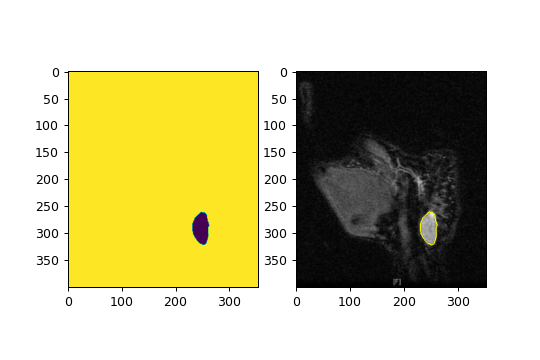

The area estimated of the tumour is about 18.422425 cm²


In [311]:
gradient2, markers2, ws2, segment2 = segmentation(im2, coord_tumour2, coord_rest2)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(gradient2)
plt.subplot(1,2,2)
plt.imshow(markers2)
plt.show()

plt.figure()
plt.subplot(1,2,1)
plt.imshow(ws2)
plt.subplot(1,2,2)
plt.imshow(segment2)
plt.show()

resolution = 0.115
pixels2, area2 =compute_area(ws2, resolution)

print("The area estimated of the tumour is about", area2, "cm²")